## IMPORT DATASETS

In [1]:
import pandas as pd

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_real = pd.read_csv("True.csv")

## Checking Data

In [3]:
df_fake.describe()

,title,text,subject,date
count,23471,23471,23471,23471
unique,17898,17450,6,1675
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [4]:
df_real.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


## Data pre-processing

### Fake

In [5]:
df_fake['text'] = df_fake['title'] + '\n' + df_fake['text']
df_fake.drop('title',axis=1,inplace=True)
df_fake.head()

,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017"


In [6]:
df_fake['isFake'] = 1
df_fake.head()

,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",1


### Real

In [7]:
df_real['text'] = df_real['title'] + '\n' + df_real['text']
df_real.drop('title',axis=1,inplace=True)
df_real.head()

,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017"


In [8]:
df_real['isFake'] = 0
df_real.head()

,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,politicsNews,"December 29, 2017",0


### Union Data

In [9]:
df = df_fake.append(df_real)
df = df.loc[:,['text', 'subject', 'date', 'isFake']].copy()
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_2196\1270347466.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_fake.append(df_real)


,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",1


In [10]:
df.shape

(44888, 4)

In [11]:
df.dtypes

text       object
subject    object
date       object
isFake      int64
dtype: object

## Saving Data

In [12]:
df.to_csv("News.csv", index=False)

## Visualize

<AxesSubplot:xlabel='isFake', ylabel='count'>

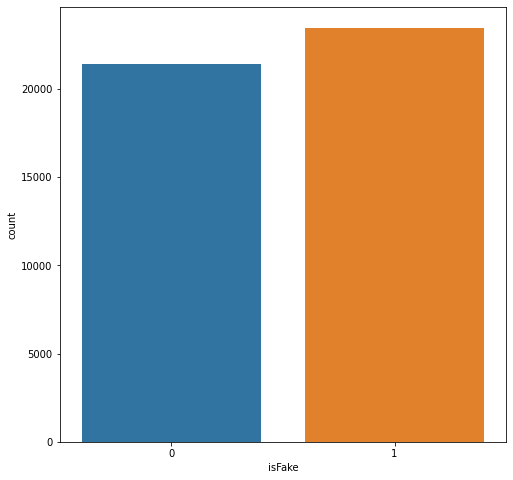

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8, 8))
sns.countplot(x = "isFake", data = df)

<AxesSubplot:xlabel='count', ylabel='subject'>

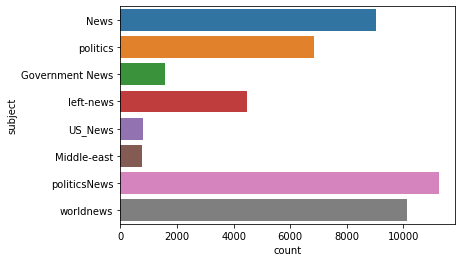

In [14]:
sns.countplot(y = "subject", data = df)

## ARIMA

<AxesSubplot:xlabel='date'>

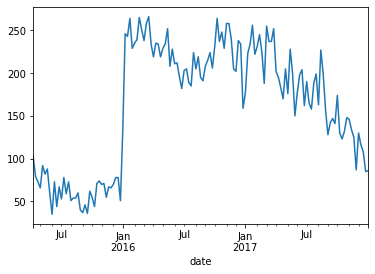

In [15]:
df_plot = df.copy()
df_plot['date'] = pd.to_datetime(df_plot['date'])
df_plot.drop(['text', 'subject'],axis=1,inplace=True)
df_end = df_plot.groupby(pd.Grouper(key = 'date', freq = 'W'))['isFake'].sum()
df_end.drop(['2015-04-05', '2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28', '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25'],axis=0,inplace=True)
df_end.plot()

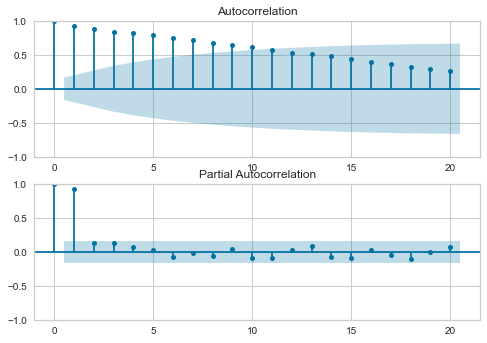

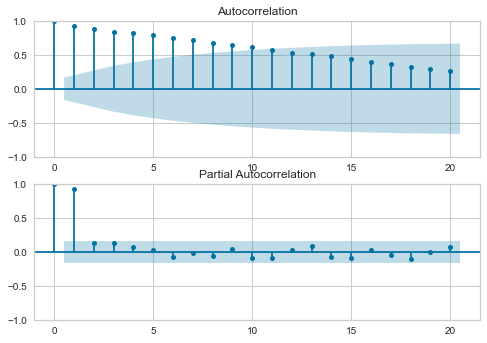

In [42]:
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(df_end, lags =20, ax = plt.gca())
plt.subplot(212)

plot_pacf(df_end, method = 'ywmle', lags = 20, ax = plt.gca())

<AxesSubplot:xlabel='date'>

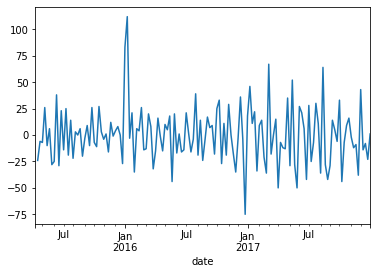

In [17]:
z_1 = df_end.diff(periods=1)
z_1.plot()

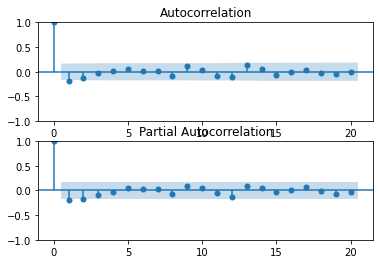

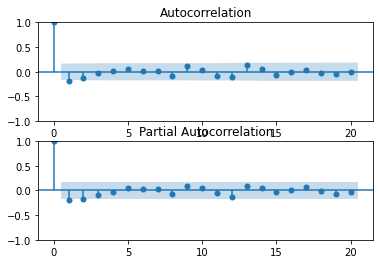

In [18]:
z_1 = z_1.dropna()

plt.figure()
plt.subplot(211)
plot_acf(z_1, lags =20, ax = plt.gca())
plt.subplot(212)

plot_pacf(z_1, method = 'ywmle', lags = 20, ax = plt.gca())

## Classification

In [19]:
df = df.sample(10000, random_state=786).reset_index(drop=True)
df.head()

,text,subject,date,isFake
0,"Trump mulls new order to replace travel ban, n...",politicsNews,"September 22, 2017",0
1,China upset by U.S. Republican platform on Sou...,politicsNews,"July 21, 2016",0
2,U.S. Navy chief says forces in Asia may be rei...,worldnews,"December 19, 2017",0
3,WATCH: GOP Leader Won’t Call Trump’s Attack O...,News,"June 5, 2016",1
4,These Two Pictures Tell You Everything You Ne...,News,"July 20, 2016",1


In [20]:
import warnings
warnings.filterwarnings(action='ignore')

import plotly.express as px

from matplotlib import rcParams

from pycaret.nlp import *
%time 
fake_news_nlp = setup(data = df, target = 'text', session_id = 123)

Description,Value
session_id,123
Documents,10000
Vocab Size,34777
Custom Stopwords,False


In [21]:
lda = create_model('lda', multi_core = True)
plot_model(lda,plot='topic_distribution')

In [22]:
%time
lda_df = assign_model(lda)
lda_df.drop(["text", "subject","date"], axis = 1, inplace=True, errors='ignore')

In [23]:
from pycaret.classification import *
%time 
setup(data = lda_df, 
      target = 'isFake',
      silent = True)

,Description,Value
0,session_id,7867
1,Target,isFake
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 7)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


(None,
 {'parameter': 'Hyperparameters',
  'auc': 'AUC',
  'confusion_matrix': 'Confusion Matrix',
  'threshold': 'Threshold',
  'pr': 'Precision Recall',
  'error': 'Prediction Error',
  'class_report': 'Class Report',
  'rfe': 'Feature Selection',
  'learning': 'Learning Curve',
  'manifold': 'Manifold Learning',
  'calibration': 'Calibration Curve',
  'vc': 'Validation Curve',
  'dimension': 'Dimensions',
  'feature': 'Feature Importance',
  'feature_all': 'Feature Importance (All)',
  'boundary': 'Decision Boundary',
  'lift': 'Lift Chart',
  'gain': 'Gain Chart',
  'tree': 'Decision Tree',
  'ks': 'KS Statistic Plot'},
 <MLUsecase.CLASSIFICATION: 1>,
 {'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierContainer at 0x1401bb29430>,
  'knn': <pycaret.containers.models.classification.KNeighborsClassifierContainer at 0x1401bb23580>,
  'nb': <pycaret.containers.models.classification.GaussianNBClassifierContainer at 0x1401bb23be0>,
  'dt': <pycaret.containers.mo

In [24]:
%time 
compare_models(sort='Accuracy',n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8687,0.9374,0.8780,0.8707,0.8742,0.7369,0.7371,0.2810
catboost,CatBoost Classifier,0.8657,0.9364,0.8755,0.8675,0.8714,0.7309,0.7310,1.8120
lightgbm,Light Gradient Boosting Machine,0.8650,0.9340,0.8749,0.8668,0.8707,0.7294,0.7297,0.0450
rf,Random Forest Classifier,0.8641,0.9296,0.8804,0.8613,0.8706,0.7276,0.7280,0.2500
ada,Ada Boost Classifier,0.8628,0.9340,0.8670,0.8689,0.8679,0.7253,0.7254,0.0920
xgboost,Extreme Gradient Boosting,0.8616,0.9305,0.8752,0.8608,0.8679,0.7225,0.7227,0.4120
et,Extra Trees Classifier,0.8461,0.9220,0.8601,0.8466,0.8531,0.6916,0.6921,0.2240
svm,SVM - Linear Kernel,0.8443,0.0000,0.8703,0.8385,0.8529,0.6875,0.6904,0.0080
lr,Logistic Regression,0.8424,0.9216,0.8549,0.8444,0.8494,0.6841,0.6846,0.8940
knn,K Neighbors Classifier,0.8420,0.9023,0.8480,0.8481,0.8479,0.6835,0.6837,0.0440


[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=7867, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=3

In [25]:
catboost = create_model('catboost',verbose = False)
lightgbm = create_model('lightgbm',verbose = False)

In [26]:
%time
tuned_catboost = tune_model(catboost, optimize = 'Accuracy', early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8500,0.9323,0.8516,0.8587,0.8552,0.6996,0.6996
1,0.8557,0.9247,0.8654,0.8583,0.8618,0.7109,0.7109
2,0.8671,0.9320,0.8654,0.8774,0.8714,0.7340,0.7341
3,0.8800,0.9332,0.8791,0.8889,0.8840,0.7597,0.7598
4,0.8671,0.9323,0.8764,0.8692,0.8728,0.7338,0.7338
5,0.8757,0.9442,0.9011,0.8654,0.8829,0.7506,0.7513
6,0.8843,0.9507,0.8901,0.8877,0.8889,0.7682,0.7682
7,0.8700,0.9378,0.8571,0.8889,0.8727,0.7400,0.7405
8,0.8757,0.9479,0.8926,0.8710,0.8816,0.7508,0.7511


In [27]:
%time
tuned_lightgbm = tune_model(lightgbm, optimize = 'Accuracy', early_stopping = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8471,0.9316,0.8489,0.8560,0.8524,0.6939,0.6939
1,0.8500,0.9231,0.8626,0.8509,0.8568,0.6993,0.6994
2,0.8600,0.9327,0.8654,0.8654,0.8654,0.7196,0.7196
3,0.8771,0.9324,0.8819,0.8819,0.8819,0.7539,0.7539
4,0.8671,0.9324,0.8736,0.8712,0.8724,0.7338,0.7338
5,0.8786,0.9447,0.9066,0.8661,0.8859,0.7563,0.7572
6,0.8900,0.9514,0.9038,0.8868,0.8952,0.7795,0.7796
7,0.8729,0.9351,0.8654,0.8873,0.8762,0.7456,0.7458
8,0.8843,0.9488,0.9063,0.8750,0.8904,0.7679,0.7685


In [28]:
blend_soft = blend_models(estimator_list = [lightgbm,catboost], optimize = 'Accuracy',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8514,0.9306,0.8544,0.8591,0.8567,0.7024,0.7025
1,0.8500,0.9211,0.8654,0.8491,0.8571,0.6993,0.6994
2,0.8643,0.9318,0.8681,0.8705,0.8693,0.7282,0.7282
3,0.8786,0.9343,0.8764,0.8886,0.8824,0.7569,0.7570
4,0.8757,0.9347,0.8819,0.8795,0.8807,0.7510,0.7510
5,0.8671,0.9415,0.8956,0.8556,0.8752,0.7333,0.7342
6,0.8814,0.9489,0.8874,0.8849,0.8861,0.7624,0.7625
7,0.8714,0.9363,0.8626,0.8870,0.8747,0.7427,0.7430
8,0.8743,0.9461,0.8898,0.8706,0.8801,0.7480,0.7482


In [29]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8543,0.9327,0.8516,0.8659,0.8587,0.7083,0.7084
1,0.8543,0.9230,0.8681,0.8541,0.8610,0.7079,0.7080
2,0.8657,0.9324,0.8681,0.8729,0.8705,0.7311,0.7311
3,0.8800,0.9359,0.8764,0.8911,0.8837,0.7598,0.7599
4,0.8729,0.9363,0.8764,0.8788,0.8776,0.7453,0.7453
5,0.8700,0.9448,0.8929,0.8621,0.8772,0.7392,0.7397
6,0.8857,0.9504,0.8901,0.8901,0.8901,0.7711,0.7711
7,0.8771,0.9381,0.8654,0.8949,0.8799,0.7542,0.7547
8,0.8771,0.9479,0.8953,0.8713,0.8832,0.7537,0.7540


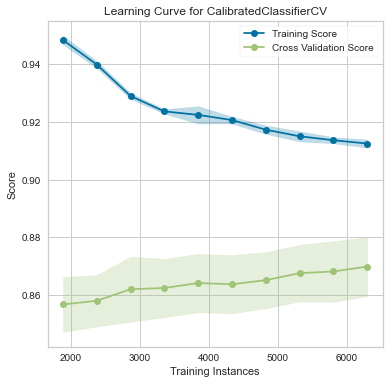

In [30]:
final_model = finalize_model(cali_model)
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='learning')

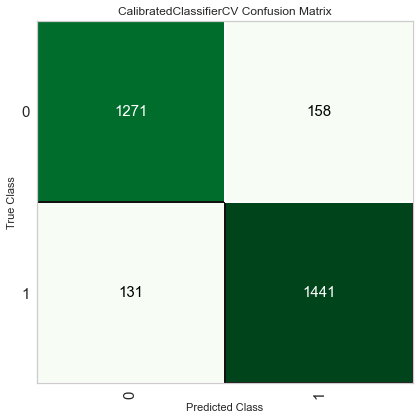

In [31]:
plt.figure(figsize=(6, 6))
plot_model(final_model, plot='confusion_matrix')

## Prediction

In [51]:
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
import seaborn as sns 
import gensim
from gensim.parsing.preprocessing import STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def clean_text(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return result

In [52]:
df['clean'] = df['text'].apply(clean_text)
df['clean_final']=df['clean'].apply(lambda x:" ".join(x))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_final, df.isFake, test_size = 0.2,random_state=0)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)
model = LogisticRegression(C=3)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

0.9932374105047228
